In [2]:
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 MB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 43.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 46.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 58.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 kB 56.

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [5]:
# Inside Docker, dataset is here:
DATA_DIR = Path("/app/data/processed")

TRAIN_DIR = DATA_DIR / "train"
VAL_DIR   = DATA_DIR / "val"
TEST_DIR  = DATA_DIR / "test"

print("Train Directory:", TRAIN_DIR)
print("Val Directory:", VAL_DIR)
print("Test Directory:", TEST_DIR)


Train Directory: /app/data/processed/train
Val Directory: /app/data/processed/val
Test Directory: /app/data/processed/test


In [6]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    VAL_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)

test_data = val_datagen.flow_from_directory(
    TEST_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

num_classes = len(train_data.class_indices)
print("Classes:", train_data.class_indices)


Found 18750 images belonging to 15 classes.
Found 5722 images belonging to 15 classes.
Found 5718 images belonging to 15 classes.
Classes: {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,895 (42.61 MB)

 Trainable params: 11,170,895 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 318s 540ms/step - accuracy: 0.5969 - loss: 1.2461 - val_accuracy: 0.7725 - val_loss: 0.7158
Epoch 2/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 346s 590ms/step - accuracy: 0.8055 - loss: 0.5710 - val_accuracy: 0.8380 - val_loss: 0.5102
Epoch 3/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 397s 678ms/step - accuracy: 0.8565 - loss: 0.4230 - val_accuracy: 0.8906 - val_loss: 0.3389
Epoch 4/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 348s 592ms/step - accuracy: 0.8824 - loss: 0.3463 - val_accuracy: 0.9116 - val_loss: 0.2660
Epoch 5/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 371s 632ms/step - accuracy: 0.8975 - loss: 0.3053 - val_accuracy: 0.9325 - val_loss: 0.2076
Epoch 6/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 376s 641ms/step - accuracy: 0.9140 - loss: 0.2583 - val_accuracy: 0.9474 - val_loss: 0.1707
Epoch 7/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 359s 612ms/step - accuracy: 0.9196 - loss: 0.2333 - val_accuracy: 0.9429 - val_loss: 0.1733
Epoch 8/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 354s 604ms/step - accuracy: 0.9304 -

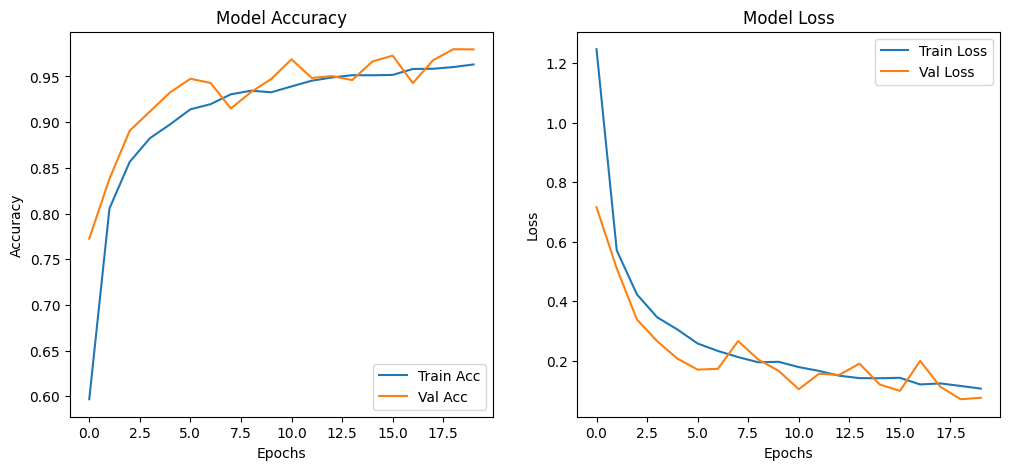

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()

plt.show()


In [11]:
from pathlib import Path

# Create /app/models directory if it doesn't exist
Path("/app/models").mkdir(parents=True, exist_ok=True)
print("✅ /app/models folder is ready")


✅ /app/models folder is ready


In [12]:
model.save("/app/models/plant_disease_cnn.keras")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [13]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc*100:.2f}%")


179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.9766 - loss: 0.0738
Test Accuracy: 97.66%


In [14]:
import numpy as np

# This works if you still have 'train_data' available from training
class_names = list(train_data.class_indices.keys())

# Make sure the folder exists
from pathlib import Path
Path("/app/models").mkdir(parents=True, exist_ok=True)

# Save labels
np.save("/app/models/class_names.npy", class_names)

print("✅ Class names saved at /app/models/class_names.npy")


✅ Class names saved at /app/models/class_names.npy


In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load trained model & class names
model = load_model("/app/models/plant_disease_cnn.keras")
class_names = np.load("/app/models/class_names.npy")

# Load and preprocess single image
img = image.load_img("/app/data/processed/test/Tomato_Early_blight/1a8bd88f-309f-4392-b387-7cb423ef0ab6___RS_Erly.B 7366.JPG", target_size=(224, 224))
img_array = np.expand_dims(np.array(img)/255.0, axis=0)

# Predict
pred = model.predict(img_array)
idx = np.argmax(pred)
print("Prediction:", class_names[idx], "| Confidence:", pred[0][idx])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction: Tomato_Early_blight | Confidence: 0.91213703
